# Descriptive Statistics

This tutorial provides Python code examples for performing descriptive statistics on data. For a better understanding of the concepts covered here, it's recommended to review the "Descriptive Statistics" presentation slides alongside this notebook.

## Understanding Descriptive Statistics

Descriptive statistics encompass various measures that summarize and describe the characteristics of a dataset. These measures include central tendency metrics like the mean and median, as well as dispersion metrics such as the range, quantiles, quartiles, interquartile range (IQR), variance, and standard deviation.

In this tutorial, we'll explore these concepts using the Iris dataset, a classic dataset in the field of machine learning and statistics. The dataset comprises measurements from 150 Iris flowers, with 50 samples from each of the three species: Setosa, Versicolour, and Virginica. Each sample includes five features:

- Sepal length (in cm)
- Sepal width (in cm)
- Petal length (in cm)
- Petal width (in cm)
- Species (Setosa, Versicolour, Virginica)

This tutorial aims to provide a clear and straightforward introduction to the basics of descriptive statistics using this well-known dataset.

### Importing Libraries and Configuration

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams


### Settings

In [3]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper right"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)



### Load the dataset and display its first 10 data samples.

In [4]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
data.head()
display (data.head(n=10))

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Central Tendency
Th following code demonstrates how to calculate key measures of central tendency: the mean, median and mode.

In [5]:
# Calculate the mean for each attribute
mean_values = data.mean(numeric_only= True)

# Calculate the median for each attribute
median_values = data.median(numeric_only= True)

# Calculate the mode for each attribute
mode_values = data.mode(numeric_only= True)

# Display the results
print("Mean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode:\n", mode_values)


Mean Values:
 sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64

Median Values:
 sepal length    5.80
sepal width     3.00
petal length    4.35
petal width     1.30
dtype: float64

Mode:
    sepal length  sepal width  petal length  petal width
0           5.0          3.0           1.5          0.2


### Symmetric vs. Skewed Data
The code provided visualizes the distributions for the attributes "sepal length," "sepal width," and "petal width." By examining these histograms, we can determine whether each attribute's distribution is symmetric, positively skewed (tail extends to the right), or negatively skewed (tail extends to the left). This analysis helps us understand how the data for these attributes is spread out and whether most values cluster around a central point or if there are outliers that pull the distribution in one direction.

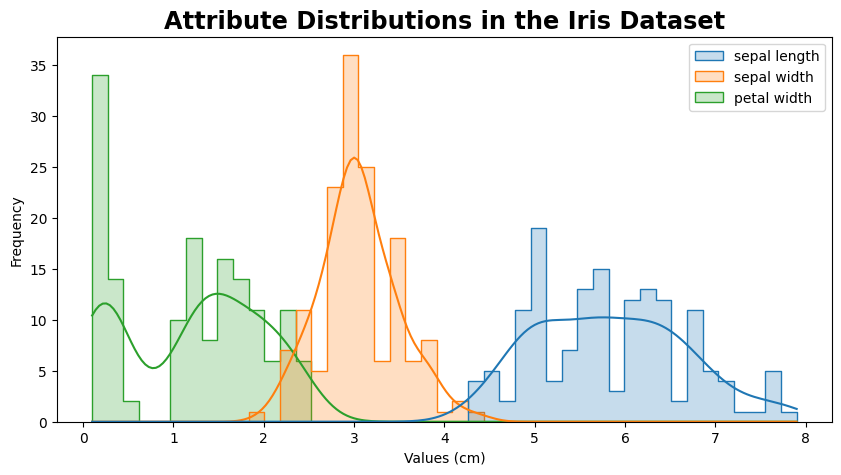

In [6]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(data[["sepal length","sepal width", "petal width"]], kde=True, bins=45, element='step', palette='tab10')
plt.title('Attribute Distributions in the Iris Dataset')
plt.xlabel('Values (cm)')
plt.ylabel('Frequency')
plt.show()

### Measures of Spread

Th following code demonstrates how to calculate key measures of spread: the range, Quantiles, Quartiles, Interquartile Range(IQR), Variance and Standard Deviation.

In [37]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Calculating the range for each numeric attribute
range_values = data[cols].apply(lambda x: x.max() - x.min())

# Calculating quantiles, including quartiles
quantiles = data.quantile([0.25, 0.5, 0.75],numeric_only=True)

# Calculating the Interquartile Range (IQR) for each numeric attribute
iqr = quantiles.loc[0.75] - quantiles.loc[0.25]

# Calculating variance, and standard deviation
variance = data.var(numeric_only=True)
sdev = data.std(numeric_only=True)


# Displaying the results
print("Range of each attribute:\n", range_values)
print("\nQuantiles (25th percentile, median, 75th percentile):\n", quantiles)
print("\nInterquartile Range (IQR) of each attribute:\n", iqr)
print("\nVariance of each attribute:\n", variance)
print("\nStandard Deviation of each attribute:\n", sdev)

Range of each attribute:
 sepal length    3.6
sepal width     2.4
petal length    5.9
petal width     2.4
dtype: float64

Quantiles (25th percentile, median, 75th percentile):
       sepal length  sepal width  petal length  petal width
0.25           5.1          2.8          1.60          0.3
0.50           5.8          3.0          4.35          1.3
0.75           6.4          3.3          5.10          1.8

Interquartile Range (IQR) of each attribute:
 sepal length    1.3
sepal width     0.5
petal length    3.5
petal width     1.5
dtype: float64

Variance of each attribute:
 sepal length    0.685694
sepal width     0.188004
petal length    3.113179
petal width     0.582414
dtype: float64

Standard Deviation of each attribute:
 sepal length    0.828066
sepal width     0.433594
petal length    1.764420
petal width     0.763161
dtype: float64


Plot the quantiles, IQR, standard deviation

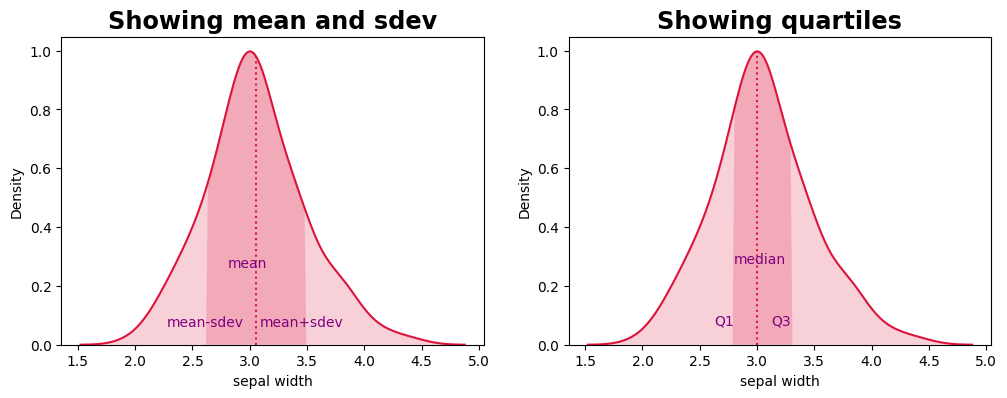

In [38]:
column = 'sepal width'
x = data[column]
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax in axes:
    sns.kdeplot(x, fill=False, color='crimson', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.text(middle+0.1, plt.ylim()[1] * 0.3, f'mean', ha='right', va='top', fontsize=10, color='purple')
        ax.text(left+0.33, plt.ylim()[1] * 0.1, f'mean-sdev', ha='right', va='top', fontsize=10, color='purple')
        ax.text(right+0.33, plt.ylim()[1] * 0.1, f'mean+sdev', ha='right', va='top', fontsize=10, color='purple')
        ax.set_title('Showing mean and sdev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.text(middle+0.25, plt.ylim()[1] * 0.3, f'median', ha='right', va='top', fontsize=10, color='purple')
        ax.text(left, plt.ylim()[1] * 0.1, f'Q1', ha='right', va='top', fontsize=10, color='purple')
        ax.text(right, plt.ylim()[1] * 0.1, f'Q3', ha='right', va='top', fontsize=10, color='purple')
        ax.set_title('Showing quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='crimson', ls=':')
    ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='crimson', alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()